**TO DO:**
1. Star Channel 
2. Lattice Channel 
3. Chain Channel 
4. ER Channel
5. Binary Asymmetric
5. Annotations

In [3]:
!pip install -e /home/sagar/modeling-info-spread

Obtaining file:///home/sagar/modeling-info-spread
  Preparing metadata (setup.py) ... done
  Attempting uninstall: src
    Found existing installation: src 0.2.8
    Uninstalling src-0.2.8:
      Successfully uninstalled src-0.2.8
  Running setup.py develop for src


In [4]:
import os
import matplotlib.pyplot as plt
from matplotlib import colormaps
from src.models.NSI import NSI
from src.models.channel import *
from tqdm.notebook import tqdm
import pickle
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from scipy import stats
from collections import defaultdict, Counter
import numpy as np
from sklearn.metrics import mean_squared_error
from itertools import chain

In [5]:
# colormap code inspired by GPT 4 
colormap_strings = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
cmaps = [plt.get_cmap(c) for c in colormap_strings]

In [6]:
hex_code = '#FCF3C5'

# Constants

In [7]:
N = 10000
T = 1000

beta = 0.01
k = 4

err = 0.07

# Objects

In [8]:
channels = {
    
    'binsym_1b_1f': single_flip_channel(1, err),
    'binsym_2b_1f': single_flip_channel(2, err),
    'binsym_3b_1f': single_flip_channel(3, err),
    
    'binsym_1b_nf': n_flip_channel(1, err),
    'binsym_2b_nf': n_flip_channel(2, err),
    'binsym_3b_nf': n_flip_channel(3, err)
    
}

In [9]:
models = {
    
    'binsym_1b_1f': NSI(N=N, T=T, P=channels['binsym_1b_1f']),
    'binsym_2b_1f': NSI(N=N, T=T, P=channels['binsym_2b_1f']),
    'binsym_3b_1f': NSI(N=N, T=T, P=channels['binsym_3b_1f']),
    
    'binsym_1b_nf': NSI(N=N, T=T, P=channels['binsym_1b_nf']),
    'binsym_2b_nf': NSI(N=N, T=T, P=channels['binsym_2b_nf']),
    'binsym_3b_nf': NSI(N=N, T=T, P=channels['binsym_3b_nf'])
    
}

In [10]:
homogeneous_outputs = {
    
    'binsym_1b_1f': models['binsym_1b_1f'].homogeneous_analytic(beta, k),
    'binsym_2b_1f': models['binsym_2b_1f'].homogeneous_analytic(beta, k),
    'binsym_3b_1f': models['binsym_3b_1f'].homogeneous_analytic(beta, k),
    
    'binsym_1b_nf': models['binsym_1b_nf'].homogeneous_analytic(beta, k),
    'binsym_2b_nf': models['binsym_2b_nf'].homogeneous_analytic(beta, k),
    'binsym_3b_nf': models['binsym_3b_nf'].homogeneous_analytic(beta, k)
    
}

In [ ]:
homogeneous_simulations = {
    
    'binsym_1b_1f': None,
    'binsym_2b_1f': None,
    'binsym_3b_1f': None,
    
    'binsym_1b_nf': None,
    'binsym_2b_nf': None,
    'binsym_3b_nf': None
    
}

In [ ]:
# unpickle

fp = '/home/sagar/modeling-info-spread/models/simulations'

for key in tqdm(homogeneous_simulations.keys()):
    
    with open(f"{fp}/{key}_bigger.pickle", 'rb') as f:
        homogeneous_simulations[key] = pickle.load(f)

# Sanity Checks

Text(0, 0.5, 'Infection Density $i_\\alpha (t)$')

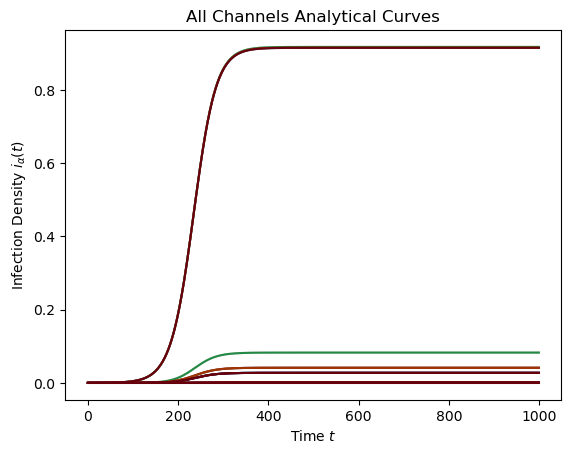

In [17]:
for n,s in enumerate(homogeneous_outputs.values()):
    for d in range(s.I[0].shape[0]):
        plt.plot(range(T), [s.I[t][d] for t in range(T)], color=cmaps[n](0.3 + 0.15*n))
        
plt.title('All Channels Analytical Curves')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Infection Density $i_\alpha (t)$')

(0.01, 0.9630433030722229)

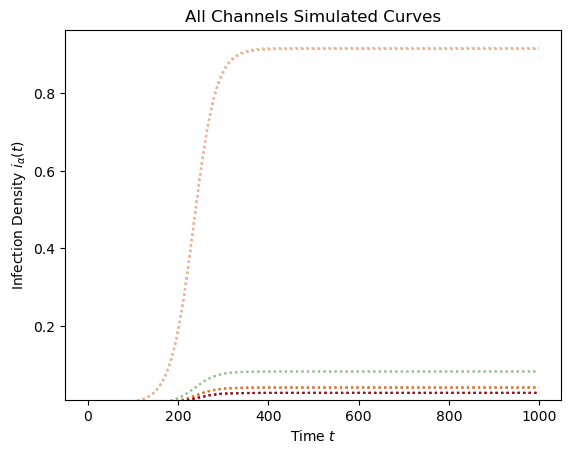

In [19]:
for n,l in enumerate(homogeneous_simulations.values()):
    for s in l:
        for d in range(s.I[0].shape[0]):
            plt.plot(range(T), [s.I[t][d]/N for t in range(T)], color=cmaps[n](0.3 + 0.15*d), alpha=0.6)
            
for n,s in enumerate(homogeneous_outputs.values()):
    for d in range(s.I[0].shape[0]):
        plt.plot(range(T), [s.I[t][d] for t in range(T)], color=cmaps[n](0.3 + 0.15*d), alpha=1, linestyle='dotted')
        
plt.title('All Channels Simulated Curves')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Infection Density $i_\alpha (t)$')

### Checking Channels

In [69]:
test_channel = 'binsym_2b_nf'

In [70]:
test_sim = homogeneous_simulations.get(test_channel)

In [71]:
test_model = homogeneous_outputs.get(test_channel)

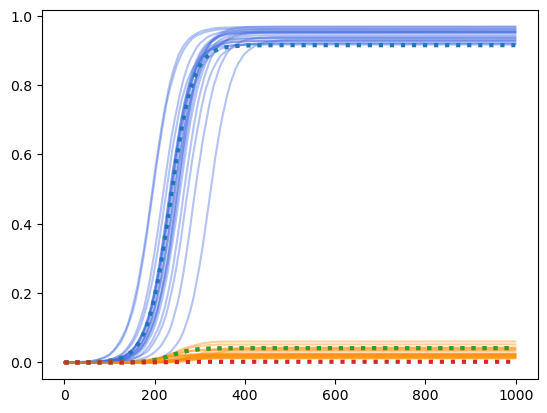

In [72]:
for run in test_sim:
    plt.plot(range(T), [i[0] for i in run.I], alpha=0.4, color='royalblue')
    plt.plot(range(T), [i[1] for i in run.I], alpha=0.4, color='darkorange')
    
plt.plot(range(T), test_model.I, linestyle='dotted', linewidth=3)

# Simulation vs. Model

Text(0, 0.5, 'Infection Density $i_\\alpha (t)$')

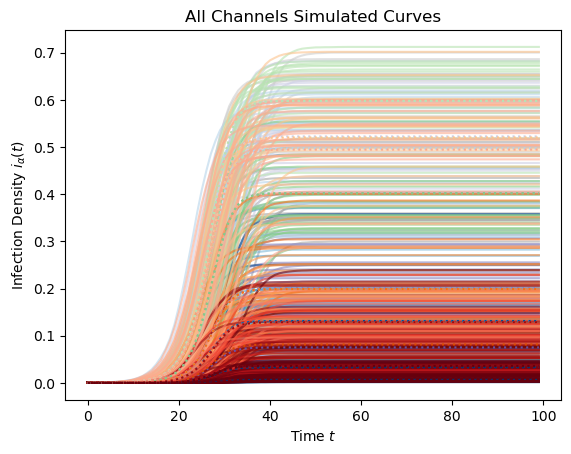

In [13]:
for n,l in enumerate(homogeneous_simulations.values()):
    for s in l:
        for d in range(s.I[0].shape[0]):
            plt.plot(range(T), [s.I[t][d]/N for t in range(T)], color=cmaps[n](0.3 + 0.15*d), alpha=0.6)
            
for n,s in enumerate(homogeneous_outputs.values()):
    for d in range(s.I[0].shape[0]):
        plt.plot(range(T), [s.I[t][d] for t in range(T)], color=cmaps[n](0.3 + 0.15*d), alpha=1, linestyle='dotted')
        
plt.title('All Channels Simulated Curves')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Infection Density $i_\alpha (t)$')

0it [00:00, ?it/s]

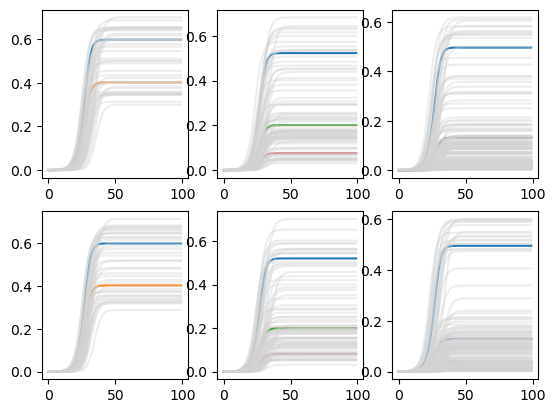

In [14]:
num_channels = len(channels.keys())

fig, axs = plt.subplots(num_channels // 3, 3)

for num, name in tqdm(enumerate(channels.keys())):
    axs[num // 3, num % 3].plot(range(T), homogeneous_outputs[name].I)
    for run in range(20):
        axs[num // 3, num % 3].plot(range(T), np.array(homogeneous_simulations[name][run].I[:-1])/N,
                                    alpha = 0.4, color='lightgrey')


## Binary Phase Space Analyses

In [11]:
errors = np.linspace(0.02, 1, 50)

In [12]:
def bin_asym_channel(e0: float,
                     e1: float) -> np.ndarray:
    
    """
    Creates a 1 bit Binary Asymmetric Channel 
    
    :param e0: error (probability of departing from original message) of 0 state
    :param e1: error (probability of departing from original message) of 1 state
    
    """
    
    M = np.array([[1-e0, e0], [e1, 1-e1]])
    
    return M

In [13]:
binary_channels = {
    'sym': [single_flip_channel(1, err) for err in errors],
    'asym': [bin_asym_channel(err, ((err-0.5) % 1)) for err in errors]
}

In [14]:
binary_models = {
    
    'sym': [NSI(N=N, T=T, P=c) for c in binary_channels['sym']],
    'asym': [NSI(N=N, T=T, P=c) for c in binary_channels['asym']]
    
}

In [15]:
binary_homo_outputs = {
    'sym': [m.homogeneous_analytic(beta, k) for m in binary_models['sym']],
    'asym': [m.homogeneous_analytic(beta, k) for m in binary_models['asym']]
}

In [ ]:
bin_homo_simulations = {
    
    'sym': [[m.homogeneous_simulations(beta, k, notebook=True) for m in binary_models['sym']] for _ in range(20)],
    'asym': [[m.homogeneous_simulations(beta, k, notebook=True) for m in binary_models['asym']] for _ in range(20)]
    
}

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
fp_bin = '/home/sagar/modeling-info-spread/models/simulations/binary_symmetric'
#os.mkdir(fp_bin)

for key, val in tqdm(bin_homo_simulations.items()):
    
    with open(f"{fp_bin}/{key}_20runs_50bin_bigger.pickle", 'wb') as f:
            pickle.dump(val, f)

In [91]:
# THE REST OF THIS NEEDS TO NOW ACCOMODATE THE NEW STRUCTURE OF BIN_HOMO_SIMULATIONS

In [92]:
bin_sym_sim_avgs = {
    'sym': list(),
    'asym': list()
}

In [93]:
for e in range(len(errors)):
    sym_vals = np.array([np.array(s[e].I) for s in bin_homo_simulations['sym']])
    asym_vals = np.array([np.array(s[e].I) for s in bin_homo_simulations['asym']])
    
    sym_means, sym_se = np.mean(sym_vals, axis=0), stats.sem(sym_vals) 
    sym_ci = sym_se * stats.t.ppf((1 + 0.95) / 2., len(sym_means)-1)
    
    asym_means, asym_se = np.mean(asym_vals, axis=0), stats.sem(asym_vals) 
    asym_ci = asym_se * stats.t.ppf((1 + 0.95) / 2., len(asym_means)-1)
    
    bin_sym_sim_avgs['sym'].append((sym_means, sym_means + sym_ci, sym_means - sym_ci))
    bin_sym_sim_avgs['asym'].append((asym_means, asym_means + asym_ci, asym_means - asym_ci))
    

TypeError: iteration over a 0-d array

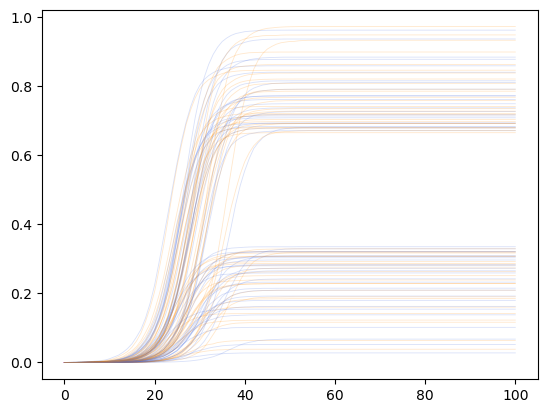

In [110]:
# Simulations
for trial in bin_homo_simulations['asym'][0]:
    
    for j in trial:
        plt.plot(range(101), [m[0] for m in j.I], color='royalblue', linewidth=0.6, alpha=0.2)
        plt.plot(range(101), [m[1] for m in j.I], color='darkorange', linewidth=0.6, alpha=0.2)
        
# Analytic
for n,j in enumerate(binary_homo_outputs['asym']):
    plt.plot(range(101), [m[0] for m in j.I], color='royalblue', linewidth=0.8)
    plt.plot(range(101), [m[1] for m in j.I], color='darkorange', linewidth=0.8)
    

#plt.xlim(0.4999, 0.5001)
#plt.ylim(0.4999, 0.5001)

/tmp/ipykernel_1999199/2917657203.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(scalarmappaple,label=r'$\epsilon$')


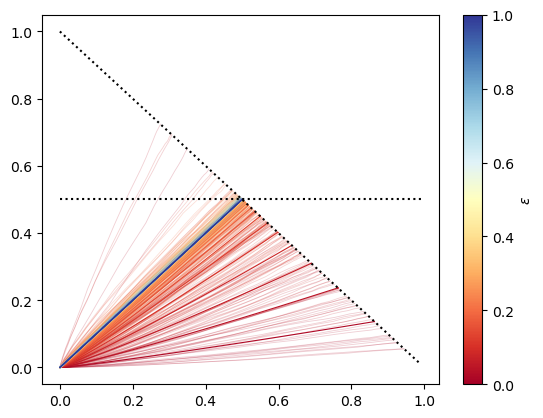

In [27]:
colormap = plt.cm.RdYlBu

# Simulations
for trial in bin_homo_simulations['sym']:
    
    for n,j in enumerate(trial):
        color = colormap(list(errors)[n])
        plt.plot([m[0] for m in j.I], [m[1] for m in j.I], color=color, linewidth=0.6, alpha=0.2)
        
# Analytic
for n,j in enumerate(binary_homo_outputs['sym']):
    color = colormap(list(errors)[n])
    plt.plot([m[0] for m in j.I], [m[1] for m in j.I], color=color, linewidth=0.8)
    
plt.plot([i/100 for i in range(100)], [1 - i/100 for i in range(100)], color='black', linestyle='dotted')
plt.plot([i/100 for i in range(100)], [0.5 for _ in range(100)], color='black', linestyle='dotted')


normalize = mcolors.Normalize(vmin=0, vmax=1)
scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array([i/100 for i in range(100)])
plt.colorbar(scalarmappaple,label=r'$\epsilon$')

#plt.xlim(0.4999, 0.5001)
#plt.ylim(0.4999, 0.5001)

In [125]:
test_eigvals = list()
test_eigvecs = list()
for c in binary_channels['asym']:
    val, vec = np.linalg.eig(1-c)
    test_eigvals.append(val)
    test_eigvecs.append(vec)

In [127]:
test_eigvecs

[array([[-0.89806271, -0.70710678],
        [ 0.43986745, -0.70710678]]),
 array([[-0.90181603, -0.70710678],
        [ 0.43212018, -0.70710678]]),
 array([[-0.90569023, -0.70710678],
        [ 0.42394011, -0.70710678]]),
 array([[-0.909688  , -0.70710678],
        [ 0.41529235, -0.70710678]]),
 array([[-0.91381155, -0.70710678],
        [ 0.40613847, -0.70710678]]),
 array([[-0.91806235, -0.70710678],
        [ 0.39643602, -0.70710678]]),
 array([[-0.92244099, -0.70710678],
        [ 0.38613809, -0.70710678]]),
 array([[-0.92694681, -0.70710678],
        [ 0.37519276, -0.70710678]]),
 array([[-0.93157762, -0.70710678],
        [ 0.36354249, -0.70710678]]),
 array([[-0.93632918, -0.70710678],
        [ 0.35112344, -0.70710678]]),
 array([[-0.94119467, -0.70710678],
        [ 0.33786475, -0.70710678]]),
 array([[-0.94616398, -0.70710678],
        [ 0.32368768, -0.70710678]]),
 array([[-0.95122282, -0.70710678],
        [ 0.3085047 , -0.70710678]]),
 array([[-0.95635157, -0.70710678],
  

/tmp/ipykernel_1999199/3315025467.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(scalarmappaple,label=r'$\epsilon$')


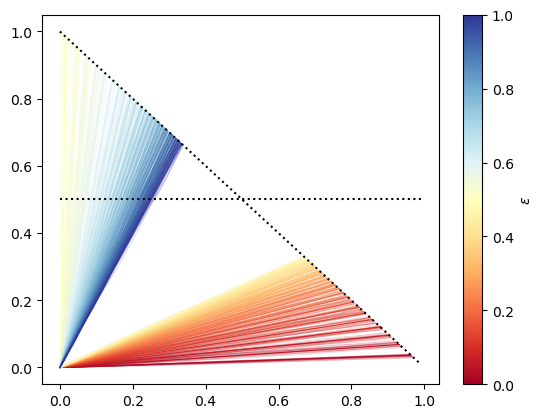

In [28]:
# Simulations
for trial in bin_homo_simulations['asym']:
    
    for n,j in enumerate(trial):
        color = colormap(list(errors)[n])
        plt.plot([m[0] for m in j.I], [m[1] for m in j.I], color=color, linewidth=0.6, alpha=0.2)
        
# Analytic
for n,j in enumerate(binary_homo_outputs['asym']):
    color = colormap(list(errors)[n])
    plt.plot([m[0] for m in j.I], [m[1] for m in j.I], color=color, linewidth=0.8)
    
plt.plot([i/100 for i in range(100)], [1 - i/100 for i in range(100)], color='black', linestyle='dotted')
plt.plot([i/100 for i in range(100)], [0.5 for _ in range(100)], color='black', linestyle='dotted')


    

normalize = mcolors.Normalize(vmin=0, vmax=1)
scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array([i/100 for i in range(100)])
plt.colorbar(scalarmappaple,label=r'$\epsilon$')

#plt.xlim(0.4999, 0.5001)
#plt.ylim(0.4999, 0.5001)

/tmp/ipykernel_1999199/2514583950.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(scalarmappaple,label=r'$\epsilon$')


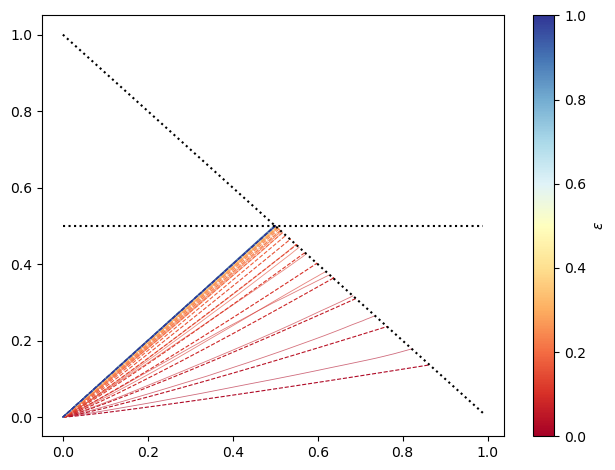

In [31]:
colormap = plt.cm.RdYlBu

# Simulations
for n, avgs in enumerate(bin_sym_sim_avgs.get('sym')):
    
    color = colormap(list(errors)[n])
    
    plt.plot([avgs[0][t][0] for t in range(T)], [avgs[0][t][1] for t in range(T)], color=color, linewidth=0.6, alpha=0.6)
    #plt.plot([avgs[1][t][0] for t in range(T)], [avgs[1][t][1] for t in range(T)], color=color, linewidth=0.6, alpha=0.2)
    #plt.plot([avgs[2][t][0] for t in range(T)], [avgs[2][t][1] for t in range(T)], color=color, linewidth=0.6, alpha=0.2)
        
        
# Analytic
for n,j in enumerate(binary_homo_outputs['sym']):
    color = colormap(list(errors)[n])
    plt.plot([m[0] for m in j.I], [m[1] for m in j.I], color=color, linewidth=0.8, linestyle='dashed')
    
plt.plot([i/100 for i in range(100)], [1 - i/100 for i in range(100)], color='black', linestyle='dotted')
plt.plot([i/100 for i in range(100)], [0.5 for _ in range(100)], color='black', linestyle='dotted')


normalize = mcolors.Normalize(vmin=0, vmax=1)
scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array([i/100 for i in range(100)])
plt.colorbar(scalarmappaple,label=r'$\epsilon$')

plt.tight_layout()

#plt.xlim(0.4999, 0.5001)
#plt.ylim(0.4999, 0.5001)

In [37]:
bin_sym_errors = list()
for n, avgs in enumerate(bin_sym_sim_avgs.get('sym')):
    mse = mean_squared_error([avgs[0][t] for t in range(T)], binary_homo_outputs['sym'][n].I)
    bin_sym_errors.append(mse)

In [38]:
bin_sym_errors

[0.002857651208604072,
 0.0012911289365428057,
 0.00014219960304669756,
 0.0008098973361435274,
 0.00047989939642771086,
 0.0002639210688563585,
 0.0006606916032533591,
 0.00038010506774313385,
 0.0016606336599761546,
 0.0016507493732177336,
 0.0006749408747143476,
 0.001519220602822763,
 0.0002063309026099433,
 0.0002830758542932064,
 0.0002427419892238802,
 0.00012255276908319492,
 0.0004123091451132513,
 0.0007088845407459598,
 0.0007916147942737827,
 0.0005296652753172885,
 0.0008015023648669743,
 0.0006300688530812657,
 9.14682051424317e-05,
 0.0005102924257517742,
 0.0002741022208684913,
 0.00101598739595355,
 0.0006249273662075993,
 0.0002228651599779947,
 0.00040214702058184417,
 0.0006443860045449761,
 0.00036731786850649614,
 0.0006440302193592904,
 0.0003815483819191271,
 0.00010423501289056311,
 0.0005506603527944351,
 0.00026478635435750074,
 0.0008815296496533591,
 0.00027705160804524095,
 0.0003730466124054432,
 0.0002525919375224326,
 0.0007358524411252899,
 0.000162159

/tmp/ipykernel_1999199/871660100.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(scalarmappaple,label=r'$\epsilon$')


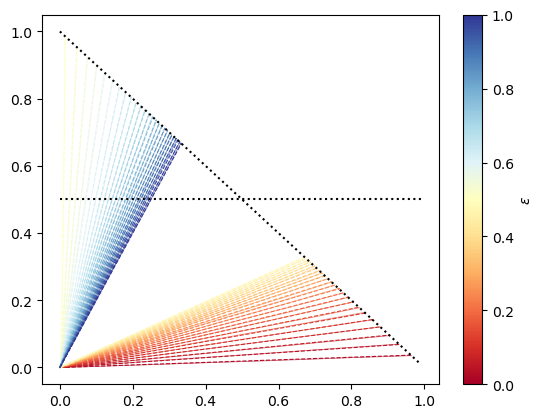

In [30]:
colormap = plt.cm.RdYlBu

hex_code = '#FCF3C5'

fig, ax = plt.subplots(1, figsize=(9,3.5), facecolor=hex_code)

# Simulations
for n, avgs in enumerate(bin_sym_sim_avgs.get('asym')):
    
    color = colormap(list(errors)[n])
    
    ax.plot([avgs[0][t][0] for t in range(T)], [avgs[0][t][1] for t in range(T)], color=color, linewidth=0.6, alpha=0.6)
    #plt.plot([avgs[1][t][0] for t in range(T)], [avgs[1][t][1] for t in range(T)], color=color, linewidth=0.6, alpha=0.2)
    #plt.plot([avgs[2][t][0] for t in range(T)], [avgs[2][t][1] for t in range(T)], color=color, linewidth=0.6, alpha=0.2)
        
        
# Analytic
for n,j in enumerate(binary_homo_outputs['asym']):
    color = colormap(list(errors)[n])
    ax.plot([m[0] for m in j.I], [m[1] for m in j.I], color=color, linewidth=0.8, linestyle='dashed')
    
ax.plot([i/100 for i in range(100)], [1 - i/100 for i in range(100)], color='black', linestyle='dotted')
ax.plot([i/100 for i in range(100)], [0.5 for _ in range(100)], color='black', linestyle='dotted')


normalize = mcolors.Normalize(vmin=0, vmax=1)
scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array([i/100 for i in range(100)])
plt.colorbar(scalarmappaple,label=r'$\epsilon$')

#plt.xlim(0.4999, 0.5001)
#plt.ylim(0.4999, 0.5001)

In [39]:
bin_asym_errors = list()
for n, avgs in enumerate(bin_sym_sim_avgs.get('asym')):
    mse = mean_squared_error([avgs[0][t] for t in range(T)], binary_homo_outputs['asym'][n].I)
    bin_asym_errors.append(mse)
    
bin_asym_errors

[0.0009238895427252584,
 0.0007172500715759857,
 0.00018218361082204267,
 0.0005116244357925973,
 0.0011765339702658267,
 0.0004199277539561587,
 0.0007354185738824293,
 8.458972126161283e-05,
 0.0007242955121913319,
 0.0003929034251189081,
 0.0006790285498143089,
 0.00032827893077709525,
 0.0011264102664069362,
 0.00023455770747696274,
 0.0008300733796316962,
 0.0006611858581379934,
 0.0005037656052214656,
 0.0004183269839026221,
 7.595375676029207e-05,
 0.0006299489124697781,
 0.0005918192849206369,
 0.0007990807904790378,
 0.0007948773720115795,
 0.0008741657870096087,
 0.0009939975508172641,
 0.0014825230181695602,
 9.122322201935309e-05,
 0.0007999504336833116,
 0.0011643573769071938,
 0.0007223437952079042,
 0.0010904751303921012,
 0.0007584009311102113,
 0.0015229573279905667,
 0.0005161990122118478,
 0.00020866847857449708,
 0.000521348164113465,
 0.00022032659916420958,
 0.0006788649294157885,
 0.0002176494532939252,
 0.0004152704286195298,
 0.0002702792157345639,
 0.000259065

# Networked Channels

In [31]:
simplex_channel = np.array([[1-err, err/2, err/2],
                           [err/2, 1-err, err/2],
                           [err/2, err/2, 1-err]])

In [32]:
cherry_channel = np.array([[1-err, err, 0],
                           [err/2, 1-err, err/2],
                           [0, err, 1-err]])

In [33]:
simplex_with_stem = np.array([[1-err, err/3, err/3, err/3],
                              [err/2, 1-err, err/2, 0],
                              [err/2, err/2, 1-err, 0],
                              [err, 0, 0, 1-err]])

In [34]:
network_channels = {
    
    'triangle': simplex_channel,
    'cherry': cherry_channel,
    'paw': simplex_with_stem
    
}

In [35]:
network_models = {key: NSI(N=N, T=T, P=val) for key,val in network_channels.items()}

In [36]:
network_analytics = {key: val.homogeneous_analytic(beta=beta, k=k) for key,val in network_models.items()}

In [40]:
network_simulations = {key: [val.homogeneous_simulations(beta=beta, k=k, notebook=True) for _ in range(20)] for key,val in network_models.items()}

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

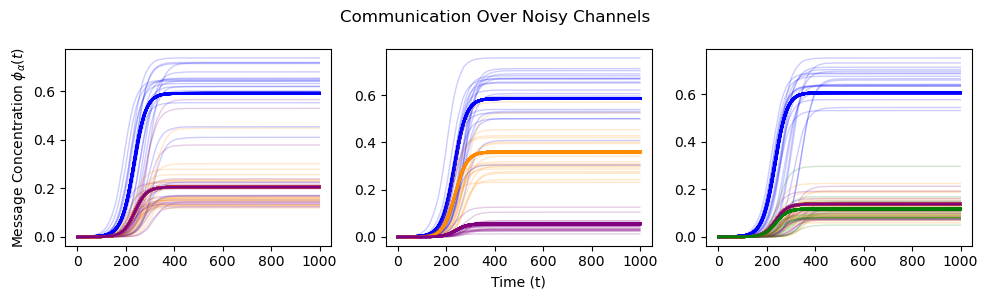

In [133]:
colors = ['blue', 'darkorange', 'purple', 'green']

#fig, axs = plt.subplots(1,3, figsize=(10,3), facecolor=hex_code)
fig, axs = plt.subplots(1,3, figsize=(10,3))

for n, channel in enumerate(network_simulations.keys()):
    analytic = network_analytics.get(channel)
    for run in network_simulations.get(channel):
        for m in range(run.I[0].shape[0]):
            axs[n].plot(range(T), [i[m] for i in run.I], color=colors[m], alpha=0.2, linewidth=1)
            axs[n].plot(range(T), [i[m] for i in analytic.I], color=colors[m], linewidth=2)
            
fig.suptitle('Communication Over Noisy Channels')
axs[0].set_ylabel(r'Message Concentration $\phi_\alpha(t)$')
axs[1].set_xlabel(r'Time (t)')

    
fig.tight_layout()
#fig.savefig('/home/sagar/modeling-info-spread/reports/figures/network_channels_bg.pdf')
fig.savefig('/home/sagar/modeling-info-spread/reports/figures/network_channels.pdf')

# Testing Chains

In [27]:
N = 10000
T = 1000

beta = 0.01
k = 4

err = 0.1 # high e/tau because <path length> ~ 10

channel = single_flip_channel(1, err)
model = NSI(N=N, T=T, P=channel)
sim = model.homogeneous_simulations(beta=beta, k=k, notebook=True, track_comm=True)

  0%|          | 0/999 [00:00<?, ?it/s]

In [28]:
# Drop subsets

all_chains = list()

chains = list(sim[1].values())

for n, chain_i in tqdm(enumerate(chains)):
    
    si = set(chain_i)
    
    flag = True
    
    for chain_j in chains[n+1:]:
        sj = set(chain_j)
        
        flag = not si < sj
        
    if flag:
        all_chains.append(chain_i)
    else: 
        pass

0it [00:00, ?it/s]

In [29]:
len(sim[1]), len(all_chains)

(10000, 9993)

In [30]:
states = [[j[1] for j in i ]for i in all_chains]

In [31]:
path_counts = [Counter(i).most_common() for i in states]

In [32]:
path_counts

[[(0, 6), (1, 2)],
 [(0, 8), (1, 3)],
 [(0, 5), (1, 1)],
 [(1, 7), (0, 1)],
 [(0, 13)],
 [(0, 13)],
 [(0, 6), (1, 5)],
 [(0, 9)],
 [(1, 7), (0, 5)],
 [(1, 6), (0, 2)],
 [(0, 9)],
 [(0, 6)],
 [(1, 11), (0, 2)],
 [(1, 12), (0, 4)],
 [(0, 7), (1, 6)],
 [(1, 8), (0, 4)],
 [(1, 9), (0, 1)],
 [(1, 8), (0, 4)],
 [(0, 12)],
 [(0, 3), (1, 1)],
 [(0, 5), (1, 4)],
 [(0, 7), (1, 3)],
 [(1, 12), (0, 4)],
 [(0, 5), (1, 2)],
 [(1, 12), (0, 1)],
 [(0, 11)],
 [(0, 7), (1, 1)],
 [(0, 6), (1, 6)],
 [(0, 5)],
 [(0, 7)],
 [(0, 7)],
 [(1, 9), (0, 1)],
 [(0, 9)],
 [(0, 12), (1, 2)],
 [(0, 12)],
 [(0, 7)],
 [(1, 17), (0, 2)],
 [(0, 8), (1, 6)],
 [(1, 5), (0, 1)],
 [(0, 8)],
 [(0, 11), (1, 3)],
 [(1, 10), (0, 4)],
 [(0, 10), (1, 2)],
 [(0, 5), (1, 5)],
 [(1, 8), (0, 4)],
 [(0, 9)],
 [(1, 8), (0, 4)],
 [(0, 4), (1, 3)],
 [(0, 6), (1, 5)],
 [(1, 5), (0, 4)],
 [(1, 5), (0, 4)],
 [(0, 6), (1, 2)],
 [(1, 9), (0, 3)],
 [(0, 9), (1, 4)],
 [(0, 8)],
 [(1, 7), (0, 4)],
 [(1, 5), (0, 3)],
 [(0, 11)],
 [(1, 4), (0, 2)],


In [35]:
avg_path_length = np.mean([len(c) for c in all_chains])
avg_path_length

9.718903232262583

In [54]:
path_counts_arr = list()

for pair in path_counts:
    arr = np.zeros(2,dtype=int)
    arr[pair[0][0]] = pair[0][1]
    
    try:
        arr[pair[1][0]] = pair[1][1]
    except IndexError:
        pass
        
    path_counts_arr.append(arr)

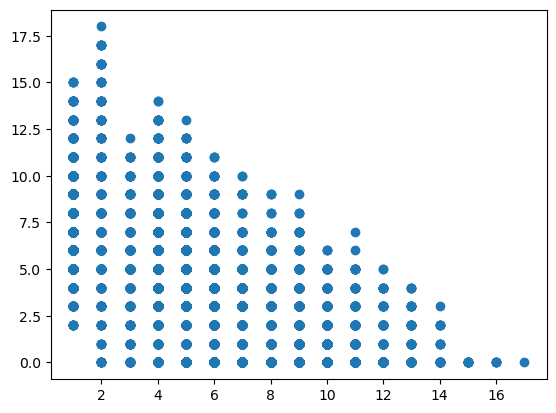

In [59]:
plt.scatter([x[0] for x in path_counts_arr], [x[1] for x in path_counts_arr])

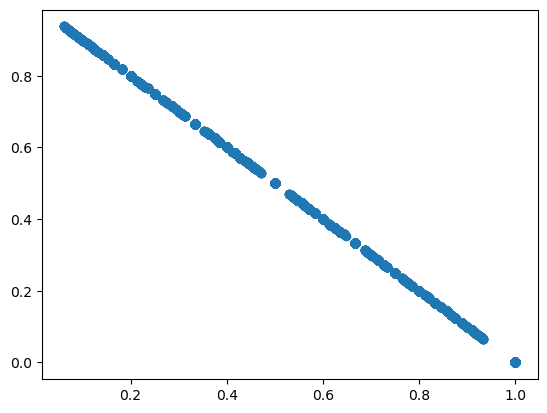

In [60]:
plt.scatter([x[0]/sum(x) for x in path_counts_arr], [x[1]/sum(x) for x in path_counts_arr])

In [67]:
path_means = [(-1*x[0] + x[1])/(2*sum(x)) for x in path_counts_arr]

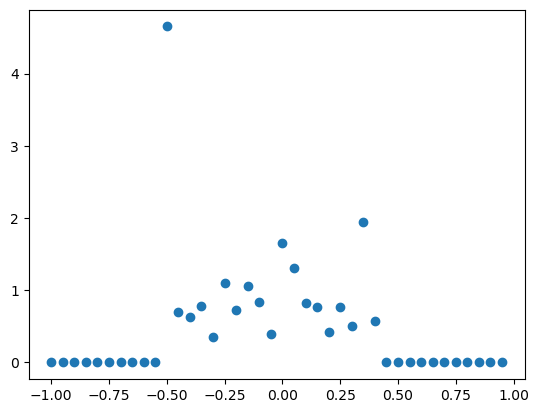

In [73]:
bins = np.linspace(-1, 1, 41)
path_mean_density, _ = np.histogram(path_means, bins=bins, density=True)

plt.plot(bins[:-1], path_mean_density, 'o')

In [78]:
path_entropies = [-1*sum([i/sum(x) * np.log2(i/sum(x)) for i in x if i != 0]) for x in path_counts_arr]

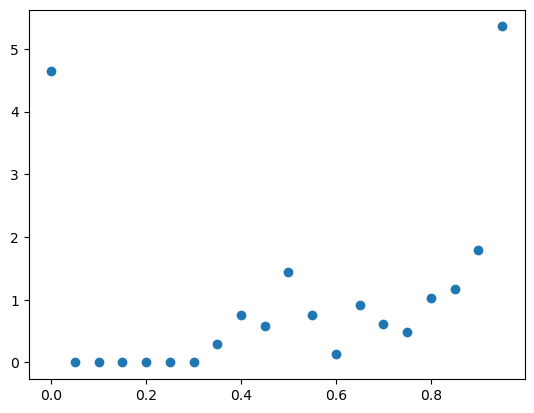

In [79]:
bins = np.linspace(0, 1, 21)
path_h_density, _ = np.histogram(path_entropies, bins=bins, density=True)

plt.plot(bins[:-1], path_h_density, 'o')

In [80]:
path_entropies

[0.8112781244591328,
 0.8453509366224364,
 0.6500224216483541,
 0.5435644431995964,
 -0.0,
 -0.0,
 0.9940302114769565,
 -0.0,
 0.9798687566511528,
 0.8112781244591328,
 -0.0,
 -0.0,
 0.6193821946787638,
 0.8112781244591328,
 0.9957274520849255,
 0.9182958340544896,
 0.4689955935892812,
 0.9182958340544896,
 -0.0,
 0.8112781244591328,
 0.9910760598382222,
 0.8812908992306927,
 0.8112781244591328,
 0.863120568566631,
 0.39124356362925566,
 -0.0,
 0.5435644431995964,
 1.0,
 -0.0,
 -0.0,
 -0.0,
 0.4689955935892812,
 -0.0,
 0.5916727785823275,
 -0.0,
 -0.0,
 0.4854607607459134,
 0.9852281360342515,
 0.6500224216483541,
 -0.0,
 0.74959525725948,
 0.863120568566631,
 0.6500224216483541,
 1.0,
 0.9182958340544896,
 -0.0,
 0.9182958340544896,
 0.9852281360342515,
 0.9940302114769565,
 0.9910760598382222,
 0.9910760598382222,
 0.8112781244591328,
 0.8112781244591328,
 0.8904916402194913,
 -0.0,
 0.9456603046006401,
 0.954434002924965,
 -0.0,
 0.9182958340544896,
 0.9910760598382222,
 0.918295834